In [82]:
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))

In [83]:
import pandas as pd
import numpy as np
import sklearn
from bokeh.io import output_notebook, show

In [84]:
pd.set_option('display.max_columns', None)
pd.set_option('mode.chained_assignment', None) # default='warn'
sklearn.set_config(display = 'diagram')
output_notebook()

Loading BokehJS ...

In [85]:
df_origin = pd.read_csv("/media/sf_iphone/superstore_data.csv")
df_origin

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,18,126,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,10,13,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,2,88,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,38,701,149,165,63,1,5,4,10,3,0,0


In [86]:
from datetime import date

def feature_map(df: pd.DataFrame) -> pd.DataFrame:
    df['Age'] = date.today().year - df['Year_Birth']
    df['Yrs_Clnt'] = (date.today() - pd.to_datetime(df['Dt_Customer']).dt.date).dt.days / 365
    return df.drop(columns = ['Id', 'Year_Birth', 'Dt_Customer'])

df = feature_map(df_origin)
df
    

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Yrs_Clnt
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,0,53,9.265753
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,62,9.268493
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,65,9.358904
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,56,8.876712
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,34,9.131507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,PhD,Divorced,66476.0,0,1,99,372,18,126,47,48,78,2,5,2,11,4,0,0,47,10.219178
2236,2n Cycle,Married,31056.0,1,0,99,5,10,13,3,8,16,1,1,0,3,8,0,0,46,10.663014
2237,Graduation,Divorced,46310.0,1,0,99,185,2,88,15,5,14,2,6,1,5,8,0,0,47,11.528767
2238,Graduation,Married,65819.0,0,0,99,267,38,701,149,165,63,1,5,4,10,3,0,0,45,10.810959


In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['Response']), df['Response'], 
    test_size=0.3, stratify = df['Response'], random_state=42
)
# in case index is not matching error
X_train.reset_index(drop = True, inplace=True)
X_test.reset_index(drop = True, inplace=True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [88]:
from ModelingTools.Explore.plots import chart_donut


y_plot = chart_donut(
    donut_arr=y_train.value_counts(dropna = False),
    title = 'Target Distribution'
)
show(y_plot)

In [89]:
X_train.dtypes

Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Complain                 int64
Age                      int64
Yrs_Clnt               float64
dtype: object

In [90]:
from ModelingTools.Explore.profiling import CategStat, NumericStat, TabularStat

categ_cols = [
    'Education', 'Marital_Status'
]
binary_categ_cols = [
    'Complain'
]
num_cols = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Yrs_Clnt'
]

schemas = {}
for col in categ_cols:
    schemas[col] = CategStat()
for col in binary_categ_cols:
    schemas[col] = CategStat(int_dtype=True, binary=True)
for col in num_cols:
    schemas[col] = NumericStat(setaside_zero=False, log_scale=True, xtreme_method='iqr')

In [91]:
ts = TabularStat(configs = schemas, n_jobs = 1)
ts.fit(X_train)

invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
invalid value encountered in log10
invalid value encountered in log10


In [92]:
# generate fake sample data
ts.generate(size = 100, ignore_na=False)

,Education,Marital_Status,Complain,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Yrs_Clnt
0,PhD,Married,0,65118.200906,0.005544,0.005768,45.908446,127.533948,35.060753,8.058074,6.920676,0.008248,1.027731,0.969856,1.981237,5.995729,2.000966,5.026057,65.217755,10.786102
1,Master,Married,0,44857.837272,0.008614,0.001399,72.558488,789.427925,9.979375,140.69278,4.007132,9.010774,2.007578,1.003318,1.958815,2.000942,1.969939,8.001667,50.955262,9.967075
2,PhD,Single,0,26071.50641,1.977188,0.005707,93.510099,8.410009,36.563019,114.405789,64.421905,8.968342,158.892866,4.045845,6.953313,0.990805,3.015111,3.99608,44.991534,9.598079
3,Graduation,Together,0,37695.079401,1.001267,0.002402,92.424924,624.359402,14.475412,737.676289,174.815046,1.030777,4.881959,1.002895,5.022884,4.008341,1.993338,7.866817,67.628149,10.591783
4,Master,Together,0,71718.865049,0.004873,1.970371,83.718535,1.006613,4.814398,6.233949,10.585022,71.379761,9.964945,0.992423,3.908146,1.009287,1.976518,4.96395,61.029859,9.872413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Graduation,Together,0,50768.330458,1.006796,1.016357,64.646364,4.172598,51.536665,10.92238,77.670835,28.996948,45.03927,4.09141,4.044496,3.059158,6.055842,6.853886,75.607477,9.287862
96,2n Cycle,Together,0,43201.774768,0.998593,0.001843,54.888744,880.444923,7.029907,101.188235,53.547927,12.046727,14.871756,0.958845,9.854812,0.015703,2.002219,2.048997,50.587597,9.5547
97,Graduation,Widow,0,50704.914801,0.008238,1.005806,33.862437,953.113417,6.897435,12.077617,153.278594,15.848985,27.375829,0.969374,0.961308,0.019301,7.0207,6.056911,54.708366,9.760172
98,PhD,Married,0,64951.646335,0.004981,0.000226,9.952597,8.466617,4.868967,34.507882,18.830985,0.970444,10.675005,2.00766,5.98602,0.026991,6.969798,3.979508,52.891259,11.078673


In [93]:
from ModelingTools.Explore.plots import plot_table_profiling, plot_categ, plot_numeric

fig = plot_table_profiling(
    ts, html_path = 
    "/media/sf_iphone/univariate_statistics_supermarket_campaign.html"
)

In [143]:
from ModelingTools.Explore.profiling import CategUniVarClfTargetCorr, NumericUniVarClfTargetCorr, TabularUniVarClfTargetCorr
from ModelingTools.Explore.plots import plot_uni_clf_target_corr, plot_categ_clf_target_corr, plot_numeric_clf_target_corr

tuvct = TabularUniVarClfTargetCorr(configs = {
    col : CategUniVarClfTargetCorr() if col in ts.get_categ_cols() else NumericUniVarClfTargetCorr()
    for col in ts.configs.keys()   
})
tuvct.fit(X_train, y_train)

# output to html:
fig = plot_uni_clf_target_corr(
    tuvct=tuvct, 
    html_path="/media/sf_iphone/univariate_feature_target_correlation_supermarket_campaign.html"
)

invalid value encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
divide by zero encountered in log10
invalid value encountered in log10
invalid value encountered in log10
divide b

In [95]:
from ModelingTools.Explore.profiling import glm_clf

lm = glm_clf(
    X_train, 
    y_train, 
    categ_cols=tuvct.get_categ_cols()
)
print(lm.model_result_.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1568
Model:                            GLM   Df Residuals:                     1547
Model Family:                Gaussian   Df Model:                           20
Link Function:               Identity   Scale:                         0.10345
Method:                          IRLS   Log-Likelihood:                -435.69
Date:                Tue, 19 Sep 2023   Deviance:                       160.04
Time:                        18:08:34   Pearson chi2:                     160.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2140
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1535    

In [96]:
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer

num_cols = tuvct.get_numeric_cols()
fs, ps = f_classif(
    X = SimpleImputer(
        strategy='median'
    ).fit_transform(X_train[num_cols]),
    y = y_train
)
pd.DataFrame({
    'Fvalue' : fs, 
    'Pvalue': ps,
}, index = num_cols).sort_values(
    by = 'Fvalue', 
    ascending=False
)

,Fvalue,Pvalue
NumCatalogPurchases,84.160857,1.394896e-19
MntMeatProducts,83.969182,1.529332e-19
MntWines,81.966834,4.002090e-19
Recency,49.940834,2.376760e-12
Yrs_Clnt,49.864191,2.468455e-12
Income,40.201400,2.989581e-10
MntGoldProds,38.400459,7.351279e-10
Teenhome,35.677401,2.876362e-09
NumWebPurchases,31.602092,2.236591e-08
MntFishProducts,24.841476,6.915094e-07


In [97]:
from ModelingTools.Explore.profiling import mutual_info_score_clf
from ModelingTools.Explore.plots import chart_barchart

mi = mutual_info_score_clf(
    X_train, 
    y_train, 
    categ_cols = tuvct.get_categ_cols()
)
mi_chart = chart_barchart(
    mi,
    max_bar=50,
    size = (750, 750),
    title="Mutual Info Score by Feature"
)
show(mi_chart)

In [98]:
from ModelingTools.Explore.plots import chart_gridplot

grid = X_train.corr()
grid.index.name = 'Feature'
grid.columns.name = 'Features'

fig = chart_gridplot(
    grid,
    size = (700, 600),
    title = 'Correlation Coefficients between Numerical Variables'    
)
show(fig)

In [99]:
from ModelingTools.Explore.profiling import chi2_score_cross

categ_cols = tuvct.get_categ_cols()
X_categ = X_train[categ_cols]

chi_test_output = chi2_score_cross(X_categ)
chi_test_output

,var1,var2,chi2,pvalue
0,Education,Education,6272.000000,0.000000
1,Education,Marital_Status,38.642155,0.086853
2,Education,Complain,7.129100,0.129221
3,Marital_Status,Education,38.642155,0.086853
4,Marital_Status,Marital_Status,10976.000000,0.000000
5,Marital_Status,Complain,0.880311,0.996535
6,Complain,Education,7.129100,0.129221
7,Complain,Marital_Status,0.880311,0.996535
8,Complain,Complain,1481.115416,0.000000


In [100]:
grid = chi_test_output.pivot(
    index='var1', 
    columns='var2', 
    values='pvalue'
)
grid.index.name = 'Feature'
grid.columns.name = 'Features'

fig = chart_gridplot(
    grid,
    reverse_color=True,
    size = (1000, 900),
    title = 'P value (Chi2 test) between Categorical Variables'    
)
show(fig)

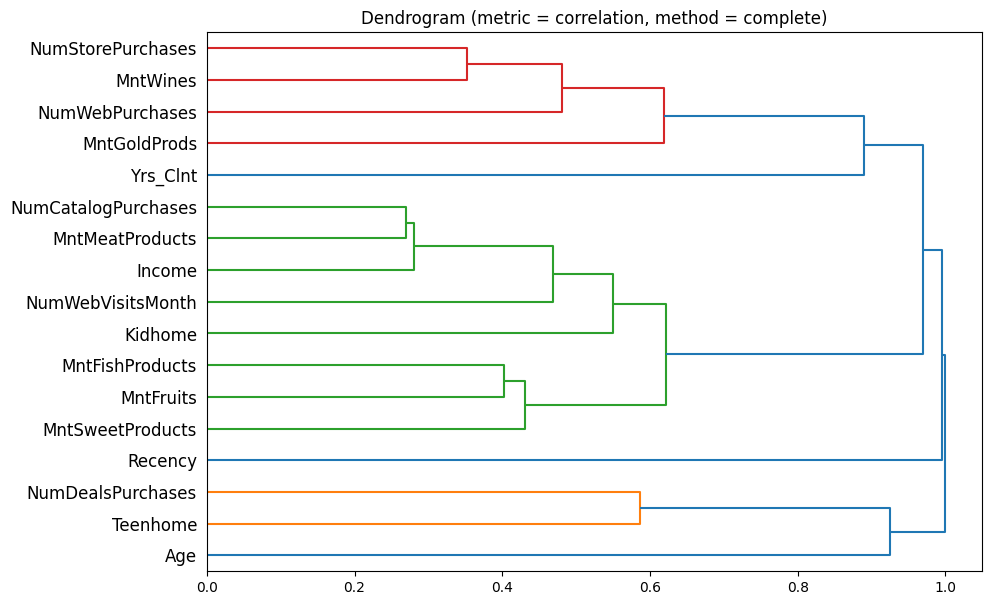

In [101]:
from scipy.spatial.distance import squareform, pdist
from ModelingTools.FeatureEngineer.transformers import plot_feature_dendrogram

numeric_cols = tuvct.get_numeric_cols()

def distance_1_corr(m):
    # penalize for correlation > 1, make sure this distance is always < 1
    return 1 - np.abs(1 - pdist(m, metric = 'correlation'))

plot_feature_dendrogram(
    X_train[numeric_cols].dropna(),
    distance_func = distance_1_corr, 
    metric = 'correlation',
    method = 'complete'
)

In [102]:
from functools import partial
from sklearn.cluster import AgglomerativeClustering
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectPercentile
from category_encoders.ordinal import OrdinalEncoder
from ModelingTools.FeatureEngineer.transformers import MyImputer, MyFeatureSelector, SelectKBestByCluster, SelectThreshold, NamedTransformer
from ModelingTools.utils.support import make_present_col_selector

# use MyFeatureSelector as it support pre-processing on features
num_selector = MyFeatureSelector(
    # selector criteria
    selector = SelectKBestByCluster(
        k = 2,  # select top 2 within each cluster
        # score is defined using Anova-F
        scorer = SelectThreshold(
            score_func = f_classif, # use Anova-F as score metric
            threshold = 0.05,  # 95% significant level
            use_p = True, # use p-value instead of F score to filter
        ),
        # cluster is defined using agglomerative clustering
        cluster_kernal = AgglomerativeClustering(
            n_clusters = None, # as we will set distance threshold
            affinity = 'precomputed', # use precomputed scores
            linkage = 'complete', # complete linkage
            distance_threshold = 0.5, # based on dendrogram above 
            compute_full_tree = True
        ),
        distance_func = distance_1_corr # defined above
        
    ),
    # preprocessing steps
    preprocess_pipe = MyImputer(strategy = 'median')
)

# categorical
categ_selector = MyFeatureSelector(
    selector = SelectPercentile(
        # use mutual info for categ features as filtering metric
        score_func = partial(
            mutual_info_classif,
            discrete_features = True,
        ),
        percentile = 75  # keep top 50% of features
    ),
    # use ordinal encoding as it meets the mutual_info_classif API request
    preprocess_pipe = Pipeline([
        ('impute', MyImputer(
            strategy='constant',
            fill_value='Other'
        )),
        ('ordinal', OrdinalEncoder(
            handle_unknown='value', 
            handle_missing='value'
        ))
    ])
)

num_cols = tuvct.get_numeric_cols()
categ_cols = tuvct.get_categ_cols()
# use NamedTransformer wrapper to keep column name
feature_selector_filter = NamedTransformer(
    ColumnTransformer(
        transformers = [
            ('numeric', num_selector, make_present_col_selector(num_cols)),
            ('categorical', categ_selector, make_present_col_selector(categ_cols))
        ],
        remainder = 'drop'
    )
)

feature_selector_filter.fit(X_train, y_train)

NamedTransformer(transformer=ColumnTransformer(transformers=[('numeric',
                                                              MyFeatureSelector(preprocess_pipe=MyImputer(strategy='median'),
                                                                                selector=SelectKBestByCluster(cluster_kernal=AgglomerativeClustering(affinity='precomputed',
                                                                                                                                                     compute_full_tree=True,
                                                                                                                                                     distance_threshold=0.5,
                                                                                                                                                     linkage='complete',
                                                                                                                                                     n_clusters=None),
                                                                                                              distance_func=<function distance_1_corr at 0...
                                                              MyFeatureSelector(preprocess_pipe=Pipeline(steps=[('impute',
                                                                                                                 MyImputer(fill_value='Other',
                                                                                                                           strategy='constant')),
                                                                                                                ('ordinal',
                                                                                                                 OrdinalEncoder())]),
                                                                                selector=SelectPercentile(percentile=75,
                                                                                                          score_func=functools.partial(<function mutual_info_classif at 0x7f3e1b99fdc0>, discrete_features=True))),
                                                              functools.partial(<function _select_present_subset at 0x7f3e1a30b160>, ['Education', 'Marital_Status', 'Complain']))]))

In [103]:
feature_selector_filter.get_feature_names_out()

array(['Income', 'MntWines', 'NumWebPurchases', 'MntSweetProducts',
       'MntFruits', 'Teenhome', 'Recency', 'Yrs_Clnt', 'MntGoldProds',
       'Kidhome', 'Education', 'Marital_Status'], dtype='<U16')

In [104]:
cluster_selector_ = feature_selector_filter.transformer.named_transformers_['numeric'].selector_
cluster_selector_.feature_score_cluster_

,Scores,Cluster
Income,2.989581e-10,0
Kidhome,6.977723e-04,7
Teenhome,2.876362e-09,3
Recency,2.376760e-12,4
MntWines,4.002090e-19,0
MntFruits,1.238221e-06,2
MntMeatProducts,1.529332e-19,0
MntFishProducts,6.915094e-07,2
MntSweetProducts,4.227721e-06,2
MntGoldProds,7.351279e-10,6


In [105]:
categ_selector_ = feature_selector_filter.transformer.named_transformers_['categorical'].selector_
#pd.Series(categ_selector_.scores_, index = categ_selector_.feature_names_in_).sort_values(ascending=False)
pd.DataFrame({
        'mutual_info_score' : categ_selector_.scores_,
        'selected': np.isin(
            categ_selector_.feature_names_in_,
            feature_selector_filter.get_feature_names_out()
        )
    },
    index = categ_selector_.feature_names_in_
).sort_values(ascending=False, by = 'mutual_info_score')


,mutual_info_score,selected
Marital_Status,0.010792,True
Education,0.004416,True
Complain,0.000507,False


In [106]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from category_encoders import CountEncoder

rfe = RFECV(
    # use random forest as base filter
    estimator = RandomForestClassifier(n_estimators = 200, n_jobs = -1),
    min_features_to_select = 8,  # keep 50% of features
    scoring = 'average_precision', # we care about precision-recall
    importance_getter = 'auto', # will use feature importance
    cv = 3, # use 3-fold cross validation
    #n_jobs = -1,
    #verbose = 3,
)

feature_selector_wrapper = MyFeatureSelector(
    selector = rfe,
    # need to preprocess feature before feeding into the selector
    preprocess_pipe = NamedTransformer(
        ColumnTransformer(
            transformers = [
                (
                    'numeric', 
                    MyImputer(strategy = 'median'), 
                    make_present_col_selector(num_cols)
                ),
                (
                    'categorical', 
                    Pipeline([
                        ('impute', MyImputer(
                            strategy='constant',
                            fill_value='Other'
                        )),
                        ('count', CountEncoder(
                            min_group_size=0.05, 
                            handle_unknown='value'
                        ))
                    ]), 
                    make_present_col_selector(categ_cols)
                )
            ],
            remainder = 'drop'
        )
    )
)
feature_selector_wrapper.fit(X_train, y_train)

MyFeatureSelector(preprocess_pipe=NamedTransformer(transformer=ColumnTransformer(transformers=[('numeric',
                                                                                                MyImputer(strategy='median'),
                                                                                                functools.partial(<function _select_present_subset at 0x7f3e1a30b160>, ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurch...
                                                                                                                 MyImputer(fill_value='Other',
                                                                                                                           strategy='constant')),
                                                                                                                ('count',
                                                                                                                 CountEncoder(combine_min_nan_groups=True,
                                                                                                                              min_group_size=0.05))]),
                                                                                                functools.partial(<function _select_present_subset at 0x7f3e1a30b160>, ['Education', 'Marital_Status', 'Complain']))])),
                  selector=RFECV(cv=3,
                                 estimator=RandomForestClassifier(n_estimators=200,
                                                                  n_jobs=-1),
                                 min_features_to_select=8,
                                 scoring='average_precision'))

In [107]:
feature_selector_wrapper.get_feature_names_out()

array(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Age', 'Yrs_Clnt', 'Education',
       'Marital_Status', 'Complain'], dtype=object)

In [108]:
pd.DataFrame(feature_selector_wrapper.selector_.cv_results_)

,mean_test_score,std_test_score,split0_test_score,split1_test_score,split2_test_score
0,0.397139,0.031204,0.430860,0.355626,0.404931
1,0.412808,0.026113,0.437912,0.376799,0.423711
2,0.413039,0.028830,0.441440,0.373504,0.424172
3,0.418680,0.029547,0.448869,0.378566,0.428606
4,0.426754,0.036942,0.476208,0.416615,0.387438
5,0.432258,0.033757,0.479366,0.415411,0.401999
6,0.448589,0.034972,0.496459,0.413891,0.435415
7,0.441830,0.039995,0.498229,0.417329,0.409930
8,0.446633,0.028846,0.487415,0.425380,0.427104
9,0.445268,0.041391,0.503218,0.409143,0.423442


In [109]:
pd.Series(
    feature_selector_wrapper.selector_.ranking_, 
    feature_selector_wrapper.selector_.feature_names_in_
).sort_values()

Income                 1
Education              1
Yrs_Clnt               1
Age                    1
NumWebVisitsMonth      1
NumStorePurchases      1
NumCatalogPurchases    1
NumWebPurchases        1
NumDealsPurchases      1
MntGoldProds           1
MntSweetProducts       1
MntFishProducts        1
MntMeatProducts        1
MntFruits              1
MntWines               1
Recency                1
Teenhome               1
Kidhome                1
Marital_Status         1
Complain               1
dtype: int64

In [110]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import RobustScaler, StandardScaler
from ModelingTools.FeatureEngineer.transformers import OutlierClipper

emb = SelectFromModel(
    # use random forest as base filter
    estimator = LogisticRegressionCV(
        penalty = 'l1',  # use L1 - Lasso to suppress coefficients
        solver = 'saga',
        scoring = 'average_precision', # we care about precision-recall
        n_jobs = -1,
        #verbose = 3,
        cv = 3
    ),
    threshold='median', # select feature whose score > median of all scores across features
    importance_getter = 'auto' # use absolute coefficient (normalized X) as selection criteria
)

feature_selector_embed = MyFeatureSelector(
    selector = emb,
    # need to preprocess feature before feeding into the selector
    preprocess_pipe = NamedTransformer(
        ColumnTransformer(
            transformers = [
                (
                    'numeric',
                    Pipeline([
                        ('outlier', OutlierClipper(strategy='iqr')),
                        ('impute', MyImputer(strategy = 'median')),
                        ('scale', StandardScaler())
                    ]),
                    make_present_col_selector(num_cols)
                ),
                (
                    'categorical', 
                    Pipeline([
                        ('impute', MyImputer(
                            strategy='constant',
                            fill_value='Other'
                        )),
                        ('count', CountEncoder(
                            min_group_size=0.05, 
                            handle_unknown='value',
                            normalize=False
                        )),
                        ('scale', StandardScaler())
                    ]), 
                    make_present_col_selector(categ_cols)
                )
            ],
            remainder = 'drop'
        )
    )
)
feature_selector_embed.fit(X_train, y_train)

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


MyFeatureSelector(preprocess_pipe=NamedTransformer(transformer=ColumnTransformer(transformers=[('numeric',
                                                                                                Pipeline(steps=[('outlier',
                                                                                                                 OutlierClipper()),
                                                                                                                ('impute',
                                                                                                                 MyImputer(strategy='median')),
                                                                                                                ('scale',
                                                                                                                 StandardScaler())]),
                                                                                                functools.partial(<function _select_present_subset at 0x7f3e1a30b160>, ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits'...
                                                                                                                 CountEncoder(combine_min_nan_groups=True,
                                                                                                                              min_group_size=0.05)),
                                                                                                                ('scale',
                                                                                                                 StandardScaler())]),
                                                                                                functools.partial(<function _select_present_subset at 0x7f3e1a30b160>, ['Education', 'Marital_Status', 'Complain']))])),
                  selector=SelectFromModel(estimator=LogisticRegressionCV(cv=3,
                                                                          n_jobs=-1,
                                                                          penalty='l1',
                                                                          scoring='average_precision',
                                                                          solver='saga'),
                                           threshold='median'))

In [111]:
feature_selector_embed.get_feature_names_out()

array(['Income', 'Teenhome', 'Recency', 'MntWines', 'MntMeatProducts',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Yrs_Clnt', 'Marital_Status'], dtype=object)

In [112]:
lr_ = feature_selector_embed.selector_.estimator_
pd.DataFrame({
        'coef' : lr_.coef_[0],
        'selected' : np.isin(
            lr_.feature_names_in_, 
            feature_selector_embed.get_feature_names_out()
        )
    },
    index = lr_.feature_names_in_
).sort_values(by = 'coef')

,coef,selected
NumStorePurchases,-0.712297,True
Recency,-0.707719,True
Teenhome,-0.624572,True
Marital_Status,-0.412791,True
MntFishProducts,-0.121828,False
Education,-0.108411,False
MntFruits,-0.003523,False
Age,0.000000,False
Complain,0.011678,False
Kidhome,0.039792,False


In [113]:
select_result = pd.DataFrame({
        'filter' : X_train.columns.isin(feature_selector_filter.get_feature_names_out()),
        'wrapper' : X_train.columns.isin(feature_selector_wrapper.get_feature_names_out()),
        'embed' : X_train.columns.isin(feature_selector_embed.get_feature_names_out())
    },
    index = X_train.columns    
).astype('int')
select_result.style.background_gradient()

,filter,wrapper,embed
Education,1,1,0
Marital_Status,1,1,1
Income,1,1,1
Kidhome,1,1,0
Teenhome,1,1,1
Recency,1,1,1
MntWines,1,1,1
MntFruits,1,1,0
MntMeatProducts,0,1,1
MntFishProducts,0,1,0


In [114]:
select_result.sum(axis = 1)[select_result.sum(axis = 1) >= 2].index

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Yrs_Clnt'],
      dtype='object')

In [115]:
def get_ranking(scores: pd.Series, columns: list, higher_is_better:bool = True):
    r = pd.Series(index = columns, dtype = 'float')
    r[scores.index] = scores.rank(ascending= not higher_is_better)
    return r.fillna(r.max() + 1).astype('int')


filter_ranking = get_ranking(
    feature_selector_filter.transformer.named_transformers_['numeric'].selector_.selected_feature_score_cluster_['Scores'],
    higher_is_better = False,
    columns = X_train.columns
)
wrapper_ranking = pd.Series(
    feature_selector_wrapper.selector_.ranking_, 
    feature_selector_wrapper.selector_.feature_names_in_
)
embed_ranking = get_ranking(
    pd.Series(
        np.abs(feature_selector_embed.selector_.estimator_.coef_[0]),
        index = feature_selector_embed.selector_.estimator_.feature_names_in_
    ),
    higher_is_better = True,
    columns = X_train.columns
)

select_ranking = pd.merge(
    filter_ranking.rename('filter'),
    wrapper_ranking.rename('wrapper'),
    left_index = True,
    right_index = True,
    how = 'outer'
).merge(
    embed_ranking.rename('embed'),
    left_index = True,
    right_index = True,
    how = 'outer'
)

(
    select_ranking.style
    .background_gradient(subset = ['filter'])
    .background_gradient(subset = ['wrapper'])
    .background_gradient(subset = ['embed'])
)


,filter,wrapper,embed
Age,11,1,20
Complain,11,1,18
Education,11,1,14
Income,4,1,5
Kidhome,10,1,17
Marital_Status,11,1,6
MntFishProducts,11,1,13
MntFruits,8,1,19
MntGoldProds,5,1,11
MntMeatProducts,11,1,10


In [116]:
select_ranking.sum(axis = 1).sort_values()[:12].index # select top 11 features

Index(['Recency', 'Yrs_Clnt', 'Income', 'Teenhome', 'MntWines',
       'NumStorePurchases', 'MntGoldProds', 'Marital_Status',
       'NumWebVisitsMonth', 'NumCatalogPurchases', 'MntMeatProducts',
       'NumWebPurchases'],
      dtype='object')

In [117]:
bool_select_cols = select_result.sum(axis = 1)[select_result.sum(axis = 1) >= 2].index
rank_select_cols = select_ranking.sum(axis = 1).sort_values()[:11].index
selected_cols = bool_select_cols.intersection(rank_select_cols)
selected_cols

Index(['Marital_Status', 'Income', 'Teenhome', 'Recency', 'MntWines',
       'MntMeatProducts', 'MntGoldProds', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Yrs_Clnt'],
      dtype='object')

In [118]:
from ModelingTools.FeatureEngineer.transformers import PreSelectSelector

fsel_pipe = PreSelectSelector(
    pre_selected_features = selected_cols
)
fsel_pipe.fit_transform(X_train, y_train)

,Marital_Status,Income,Teenhome,Recency,MntWines,MntMeatProducts,MntGoldProds,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Yrs_Clnt
0,Married,37054.0,1,89,12,6,5,0,3,7,10.016438
1,Married,43974.0,0,19,378,101,72,4,6,7,10.775342
2,Married,15072.0,0,96,8,15,18,1,3,5,9.961644
3,Single,31560.0,0,98,62,20,7,1,3,8,10.243836
4,Single,76624.0,1,68,411,147,66,10,7,1,9.328767
...,...,...,...,...,...,...,...,...,...,...,...
1563,Single,58684.0,0,71,479,179,85,3,12,2,9.265753
1564,Single,18746.0,0,41,2,11,20,0,3,6,9.315068
1565,Single,77598.0,0,53,1193,281,33,5,13,3,10.695890
1566,Married,62670.0,1,57,539,92,38,3,13,3,9.632877


In [119]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, FunctionTransformer
from sklearn.base import clone
from ModelingTools.FeatureEngineer.transformers import NamedTransformer, BucketCategByFsel, BucketCategValue, OutlierClipper, MyImputer
from ModelingTools.Explore.profiling import log10pc, exp10pc

num_cols = tuvct.get_numeric_cols()
num_log_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                'MntGoldProds']
num_non_log_cols = list(set(num_cols) - set(num_log_cols))
categ_cols = tuvct.get_categ_cols()

categ_pipe = Pipeline([
    ('impute', MyImputer(
        strategy='constant', 
        fill_value='Missing'
    )),
    #('combine_categ', BucketCategValue(threshold=0.9, handle_unknown='ignore')),
    ('ohe', NamedTransformer(
        OneHotEncoder(
            sparse=False, 
            handle_unknown='ignore'
        )
    ))
])

num_log_pipe = Pipeline([
    ('outlier', OutlierClipper(strategy='iqr')),
    ('impute', MyImputer(strategy='median')),
    ('log', NamedTransformer(
        FunctionTransformer(
            func = log10pc, 
            inverse_func = exp10pc
        )
    )),
    ('scale', StandardScaler())
])

num_non_log_pipe = Pipeline([
    ('outlier', OutlierClipper(strategy='iqr')),
    ('impute', MyImputer(strategy='median')),
    ('scale', RobustScaler())
])

preprocessing_pipe = NamedTransformer(
    ColumnTransformer(
        transformers = [
            ('categ', categ_pipe, make_present_col_selector(categ_cols)),
            ('numeric_log', num_log_pipe, make_present_col_selector(num_log_cols)),
            ('numeric_non_log', num_non_log_pipe, make_present_col_selector(num_non_log_cols))
        ],
        remainder = 'drop'
    )
)
preprocessing_pipe.fit(fsel_pipe.fit_transform(X_train, y_train), y_train)

NamedTransformer(transformer=ColumnTransformer(transformers=[('categ',
                                                              Pipeline(steps=[('impute',
                                                                               MyImputer(fill_value='Missing',
                                                                                         strategy='constant')),
                                                                              ('ohe',
                                                                               NamedTransformer(transformer=OneHotEncoder(handle_unknown='ignore',
                                                                                                                          sparse=False)))]),
                                                              functools.partial(<function _select_present_subset at 0x7f3e1a30b160>, ['Education', 'Marital_Status', 'Complain'])...
                                                             ('numeric_non_log',
                                                              Pipeline(steps=[('outlier',
                                                                               OutlierClipper()),
                                                                              ('impute',
                                                                               MyImputer(strategy='median')),
                                                                              ('scale',
                                                                               RobustScaler())]),
                                                              functools.partial(<function _select_present_subset at 0x7f3e1a30b160>, ['NumWebPurchases', 'Kidhome', 'Income', 'Recency', 'Teenhome', 'NumStorePurchases', 'Yrs_Clnt', 'NumWebVisitsMonth', 'NumDealsPurchases', 'Age', 'NumCatalogPurchases']))]))

In [120]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(
    objective='binary', 
    n_estimators=50, 
    boosting_type='gbdt', 
    importance_type='gain',
    class_weight='balanced'
)

model_pipeline = Pipeline([
    ('fsel', fsel_pipe),
    ('preprocess', preprocessing_pipe),
    ('model', model)
])

In [121]:
from warnings import simplefilter
simplefilter("ignore", category=UserWarning)
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner
from optuna.distributions import FloatDistribution, IntDistribution, CategoricalDistribution
from optuna.integration import OptunaSearchCV
optuna.logging.set_verbosity(optuna.logging.INFO)

optuna_storage = "sqlite:////home/luntaixia/Downloads/demo_optuna_tuning.db"
study_name = "supermarket-campaign-modeling"

study = optuna.create_study(
    storage = optuna_storage,
    study_name = study_name,
    pruner = MedianPruner(),
    direction = 'maximize',
    sampler = TPESampler(),
    load_if_exists = True
)

hyper_tuner = OptunaSearchCV(
    estimator = model_pipeline,
    param_distributions={
        # preprocessing parameter
        'preprocess__transformer__numeric_log__impute__strategy': CategoricalDistribution(choices=('mean', 'median')),
        'preprocess__transformer__numeric_log__outlier__strategy': CategoricalDistribution(choices=('iqr', 'quantile')),
        'preprocess__transformer__numeric_log__outlier__quantile_range': CategoricalDistribution(choices=((1, 99), (5, 95))),
        'preprocess__transformer__numeric_non_log__outlier__strategy': CategoricalDistribution(choices=('iqr', 'quantile')),
        'preprocess__transformer__numeric_non_log__outlier__quantile_range': CategoricalDistribution(choices=((1, 99), (5, 95))),
        # boosting regularization
        'model__learning_rate': FloatDistribution(0.001, 0.35, log=True),
        'model__reg_alpha': FloatDistribution(1e-6, 1e2, log=True),  # l1
        'model__reg_lambda': FloatDistribution(1e-6, 1e2, log=True),  # l2
        # tree regularization
        'model__max_depth': IntDistribution(3, 12, step=3),
        'model__num_leaves': IntDistribution(20, 100, step=10),
        'model__min_split_gain': FloatDistribution(1e-3, 1e2, log=True),  # min_split_loss
        'model__subsample': FloatDistribution(0.3, 1, step=0.1),
        'model__min_child_weight': IntDistribution(1, 20),
        'model__colsample_bytree': FloatDistribution(0.3, 1, step=0.1),
        # class-imbalance parameters
        'model__class_weight': CategoricalDistribution(choices = ['balanced', None]),
    },
    cv = 3, # 3-fold cross validation
    error_score = 'raise',
    n_trials = 100, # do 100 trials on hyperparameter study
    refit = True, # will retrain on all trainingd data after cross validation
    return_train_score = True,
    scoring = 'average_precision',
    study = study,
    verbose = 3,
)
hyper_tuner.fit(X_train, y_train)

[I 2023-09-19 18:08:48,444] A new study created in RDB with name: supermarket-campaign-modeling
OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
[I 2023-09-19 18:08:48,452] Searching the best hyperparameters using 1568 samples...


[I 2023-09-19 18:08:48,792] Trial 0 finished with value: 0.3650624787088849 and parameters: {'preprocess__transformer__numeric_log__impute__strategy': 'mean', 'preprocess__transformer__numeric_log__outlier__strategy': 'quantile', 'preprocess__transformer__numeric_log__outlier__quantile_range': (5, 95), 'preprocess__transformer__numeric_non_log__outlier__strategy': 'iqr', 'preprocess__transformer__numeric_non_log__outlier__quantile_range': (1, 99), 'model__learning_rate': 0.0014126797909744158, 'model__reg_alpha': 0.004432924270636916, 'model__reg_lambda': 0.00018231472612065844, 'model__max_depth': 12, 'model__num_leaves': 70, 'model__min_split_gain': 0.0631538026616884, 'model__subsample': 0.6000000000000001, 'model__min_child_weight': 13, 'model__colsample_bytree': 0.7, 'model__class_weight': None}. Best is trial 0 with value: 0.3650624787088849.
[I 2023-09-19 18:08:49,112] Trial 1 finished with value: 0.36438293509116154 and parameters: {'preprocess__transformer__numeric_log__impute

OptunaSearchCV(cv=3, error_score='raise',
               estimator=Pipeline(steps=[('fsel',
                                          PreSelectSelector(pre_selected_features=Index(['Marital_Status', 'Income', 'Teenhome', 'Recency', 'MntWines',
       'MntMeatProducts', 'MntGoldProds', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Yrs_Clnt'],
      dtype='object'))),
                                         ('preprocess',
                                          NamedTransformer(transformer=Col...
                                    'preprocess__transformer__numeric_log__outlier__strategy': CategoricalDistribution(choices=('iqr', 'quantile')),
                                    'preprocess__transformer__numeric_non_log__outlier__quantile_range': CategoricalDistribution(choices=((1, 99), (5, 95))),
                                    'preprocess__transformer__numeric_non_log__outlier__strategy': CategoricalDistribution(choices=('iqr', 'quantile'))},
               return_train_score=True, scoring='average_precision',
               study=<optuna.study.study.Study object at 0x7f3e1460b400>,
               verbose=3)

In [122]:
hyper_tuner.best_params_

{'model__class_weight': 'balanced',
 'model__colsample_bytree': 1.0,
 'model__learning_rate': 0.25602621828244077,
 'model__max_depth': 6,
 'model__min_child_weight': 15,
 'model__min_split_gain': 0.5110955516867346,
 'model__num_leaves': 90,
 'model__reg_alpha': 3.364227361475725e-06,
 'model__reg_lambda': 1.0458724719373687e-05,
 'model__subsample': 0.8,
 'preprocess__transformer__numeric_log__impute__strategy': 'median',
 'preprocess__transformer__numeric_log__outlier__quantile_range': [1, 99],
 'preprocess__transformer__numeric_log__outlier__strategy': 'quantile',
 'preprocess__transformer__numeric_non_log__outlier__quantile_range': [1, 99],
 'preprocess__transformer__numeric_non_log__outlier__strategy': 'iqr'}

In [123]:
hyper_tuner.study_.trials_dataframe(attrs = ['value', 'params']).sort_values(by = 'value', ascending = False).head()

,value,params_model__class_weight,params_model__colsample_bytree,params_model__learning_rate,params_model__max_depth,params_model__min_child_weight,params_model__min_split_gain,params_model__num_leaves,params_model__reg_alpha,params_model__reg_lambda,params_model__subsample,params_preprocess__transformer__numeric_log__impute__strategy,params_preprocess__transformer__numeric_log__outlier__quantile_range,params_preprocess__transformer__numeric_log__outlier__strategy,params_preprocess__transformer__numeric_non_log__outlier__quantile_range,params_preprocess__transformer__numeric_non_log__outlier__strategy
89,0.531611,balanced,1.0,0.256026,6,15,0.511096,90,0.000003,0.000010,0.8,median,"(1, 99)",quantile,"(1, 99)",iqr
82,0.530825,balanced,1.0,0.104416,6,10,0.078970,90,0.000030,0.000004,0.9,median,"(1, 99)",quantile,"(1, 99)",iqr
88,0.530791,balanced,1.0,0.276847,9,13,0.249340,90,0.000004,0.000006,0.8,median,"(1, 99)",quantile,"(1, 99)",iqr
80,0.529959,balanced,1.0,0.074391,6,9,0.074018,90,0.000029,0.000005,0.9,median,"(1, 99)",quantile,"(1, 99)",iqr
93,0.528157,balanced,1.0,0.253964,6,14,1.264435,90,0.000001,0.000002,0.8,median,"(1, 99)",quantile,"(5, 95)",iqr


In [124]:
from sklearn.calibration import CalibratedClassifierCV, IsotonicRegression

calib = CalibratedClassifierCV(
    base_estimator = hyper_tuner.best_estimator_,
    method = 'isotonic',  # use isotonic regression for non-parametric approach
    cv = 'prefit',
)
calib.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=Pipeline(steps=[('fsel',
                                                       PreSelectSelector(pre_selected_features=Index(['Marital_Status', 'Income', 'Teenhome', 'Recency', 'MntWines',
       'MntMeatProducts', 'MntGoldProds', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Yrs_Clnt'],
      dtype='object'))),
                                                      ('preprocess',
                                                       NamedTransformer(transformer=ColumnTransform...
                                                                                                                     functools.partial(<function _select_present_subset at 0x7f3e1a30b160>, ['NumWebPurchases', 'Kidhome', 'Income', 'Recency', 'Teenhome', 'NumStorePurchases', 'Yrs_Clnt', 'NumWebVisitsMonth', 'NumDealsPurchases', 'Age', 'NumCatalogPurchases']))]))),
                                                      ('model',
                                                       LGBMClassifier(class_weight='balanced',
                                                                      importance_type='gain',
                                                                      learning_rate=0.25602621828244077,
                                                                      max_depth=6,
                                                                      min_child_weight=15,
                                                                      min_split_gain=0.5110955516867346,
                                                                      n_estimators=50,
                                                                      num_leaves=90,
                                                                      objective='binary',
                                                                      reg_alpha=3.364227361475725e-06,
                                                                      reg_lambda=1.0458724719373687e-05,
                                                                      subsample=0.8))]),
                       cv='prefit', method='isotonic')

In [125]:
from sklearn.calibration import calibration_curve
from ModelingTools.Evaluation.plots import chart_calibration_curve

prob_true_train_precalib, prob_pred_train_precalib = calibration_curve(
    y_true = y_train, 
    y_prob = hyper_tuner.predict_proba(X_train)[:,1], 
    normalize=False, 
    n_bins=25, 
    strategy='quantile'
)

prob_true_train, prob_pred_train = calibration_curve(
    y_true = y_train, 
    y_prob = calib.predict_proba(X_train)[:,1], 
    normalize=False, 
    n_bins=25, 
    strategy='quantile'
)
prob_true_test, prob_pred_test = calibration_curve(
    y_true = y_test, 
    y_prob = calib.predict_proba(X_test)[:,1], 
    normalize=False, 
    n_bins=25, 
    strategy='quantile'
)

fig = chart_calibration_curve(
    cali_curves={
        'pre-calib' : {
            'prob_true': prob_true_train_precalib.tolist(),
            'prob_pred': prob_pred_train_precalib.tolist(),
        },
        'train' : {
            'prob_true': prob_true_train.tolist(),
            'prob_pred': prob_pred_train.tolist(),
        },
        'test' : {
            'prob_true': prob_true_test.tolist(),
            'prob_pred': prob_pred_test.tolist(),
        }
    },
    size = (600, 300)
)
show(fig)

In [126]:
from joblib import dump

dump(calib, filename='/media/sf_iphone/marketing-campaign.joblib')

['/media/sf_iphone/marketing-campaign.joblib']

In [127]:
from joblib import load

modeling = load('/media/sf_iphone/marketing-campaign.joblib')

In [128]:
from sklearn.metrics import classification_report

r = classification_report(
    y_true = y_test.values,
    y_pred = modeling.predict(X_test),
)
print(r)

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       572
           1       0.53      0.65      0.59       100

    accuracy                           0.86       672
   macro avg       0.73      0.78      0.75       672
weighted avg       0.88      0.86      0.87       672



In [129]:
from sklearn.metrics import roc_auc_score, average_precision_score

y_prob = modeling.predict_proba(X_test)[:,1]
print(
    roc_auc_score(y_test.values, y_prob), 
    average_precision_score(y_test.values, y_prob)
)

0.821993006993007 0.46093355041581613


In [130]:
from ModelingTools.Evaluation.metrics import binary_clf_metric_at_thresholds

binary_metrics_train = binary_clf_metric_at_thresholds(y_train, modeling.predict_proba(X_train)[:,1])
binary_metrics_test = binary_clf_metric_at_thresholds(y_test, modeling.predict_proba(X_test)[:,1])

In [131]:
from ModelingTools.Evaluation.plots import chart_roc_curve

fig = chart_roc_curve(
    binary_metrics_train,
    binary_metrics_test,
    names = ['train', 'test']
)
show(fig)

In [132]:
from ModelingTools.Evaluation.plots import chart_pr_curve

fig = chart_pr_curve(
    binary_metrics_train,
    binary_metrics_test,
    names = ['train', 'test']
)
show(fig)

In [133]:
from ModelingTools.Evaluation.plots import chart_confusion_maxtrix

fig = chart_confusion_maxtrix(metrics = binary_metrics_test,)
show(fig)

In [134]:
from ModelingTools.Explore.plots import chart_barchart

importance_chart = chart_barchart(
    pd.Series(
        modeling.base_estimator['model'].feature_importances_,
        index = modeling.base_estimator['preprocess'].get_feature_names_out()
    ).sort_values(ascending = False),
    max_bar=50,
    size = (900, 600),
    title="Feature Importances by Feature"
)
show(importance_chart)

In [135]:
X_train_premodel = modeling.base_estimator[:-1].transform(X_train)
X_test_premodel = modeling.base_estimator[:-1].transform(X_test)
X_train_premodel

,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,MntWines,MntMeatProducts,MntGoldProds,Income,Teenhome,Recency,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Yrs_Clnt
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.195811,-1.410407,-1.023103,-0.434653,1.0,0.80,-0.50,-0.4,0.25,-0.142053
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.700215,0.311604,0.911484,-0.226422,0.0,-0.60,0.50,0.2,0.25,0.637131
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.402542,-0.879046,-0.130656,-1.096119,0.0,0.94,-0.25,-0.4,-0.25,-0.198312
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.308575,-0.704256,-0.800369,-0.599974,0.0,0.98,-0.25,-0.4,0.50,0.091421
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.747150,0.550867,0.845080,0.756058,1.0,0.38,2.00,0.4,-1.25,-0.848101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.833032,0.676686,1.038372,0.216221,0.0,0.44,0.25,1.4,-1.00,-0.912799
1564,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-2.020168,-1.063958,-0.053167,-0.985564,0.0,-0.16,-0.50,-0.4,0.00,-0.862166
1565,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.345341,0.965256,0.319890,0.785367,0.0,0.08,0.75,1.6,-0.75,0.555556
1566,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.899248,0.252230,0.426116,0.336164,1.0,0.16,0.25,1.6,-0.75,-0.535865


In [136]:
import shap

explainer = shap.TreeExplainer(
    model = modeling.base_estimator['model'],
    data = X_train_premodel, # specify this
    model_output = 'probability'  # explain the output of the model transformed into probability space 
    # (note that this means the SHAP values now sum to the probability output of the model)
)
# shap_values = explainer.shap_values(X_train_premodel)
# shap_values

In [137]:
exps_train = explainer(X_train_premodel)
exps_test = explainer(X_test_premodel)
exps_test  # support indexing for specific sample

.values =
array([[ 0.        ,  0.        ,  0.        , ..., -0.13985187,
        -0.0871165 , -0.11592602],
       [ 0.        ,  0.        ,  0.        , ...,  0.03309161,
         0.12315704,  0.26530398],
       [ 0.        ,  0.        ,  0.        , ...,  0.00534162,
         0.01228155, -0.0437162 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.11875261,
        -0.0838459 , -0.00449876],
       [ 0.        ,  0.        ,  0.        , ...,  0.05543712,
        -0.04335249, -0.04148173],
       [ 0.        ,  0.        ,  0.        , ..., -0.02052712,
        -0.0478653 , -0.07673478]])

.base_values =
array([0.25614627, 0.25614627, 0.25614627, 0.25614627, 0.25614627,
       0.25614627, 0.25614627, 0.25614627, 0.25614627, 0.25614627,
       0.25614627, 0.25614627, 0.25614627, 0.25614627, 0.25614627,
       0.25614627, 0.25614627, 0.25614627, 0.25614627, 0.25614627,
       0.25614627, 0.25614627, 0.25614627, 0.25614627, 0.25614627,
       0.25614627, 0.25614

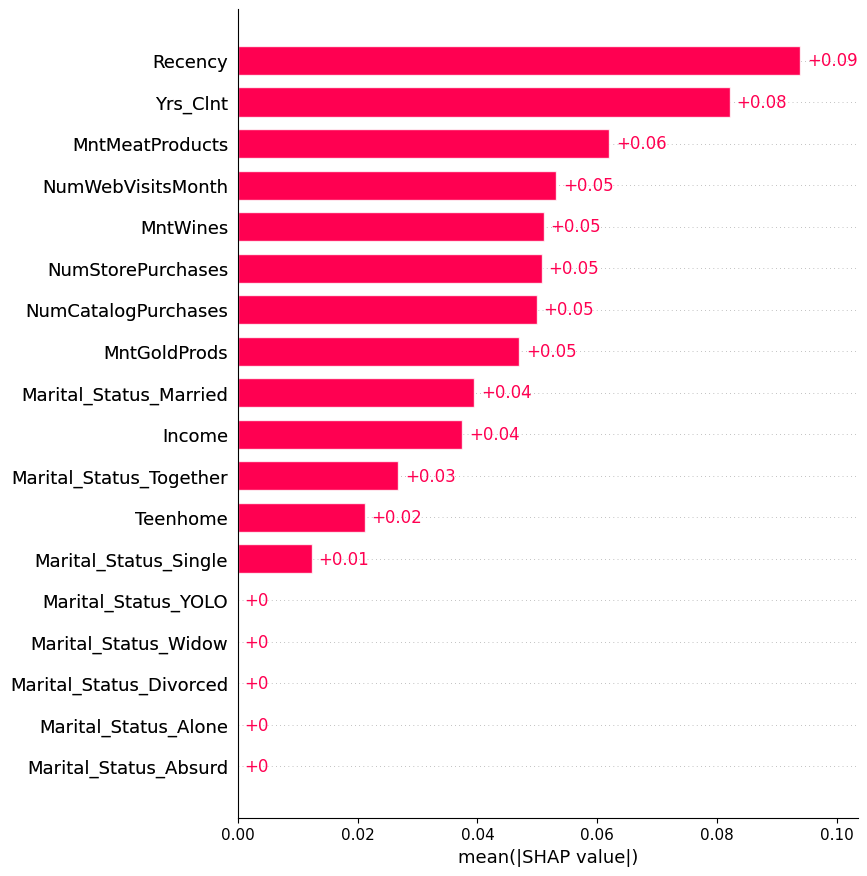

In [138]:
# global level feature importance
# shap.summary_plot(shap_values, X_train_premodel, plot_type='bar')
shap.plots.bar(exps_train, max_display = 50)

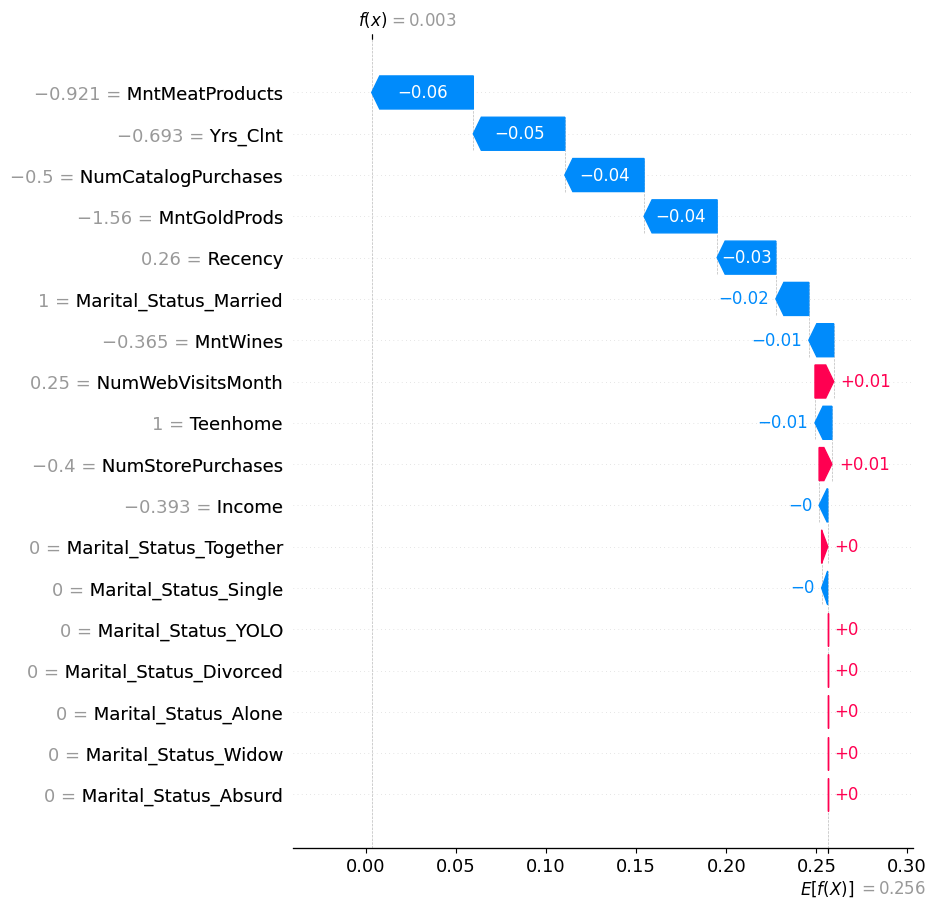

In [139]:

# exp = shap.Explanation(
#     values = shap_values[50],
#     base_values = explainer.expected_value,
#     data = X_train_premodel.iloc[50, :],
# )

# local instance level explanation
shap.plots.waterfall(exps_test[50], max_display=50)

In [140]:
shap.initjs()
shap.plots.force(exps_test[101])

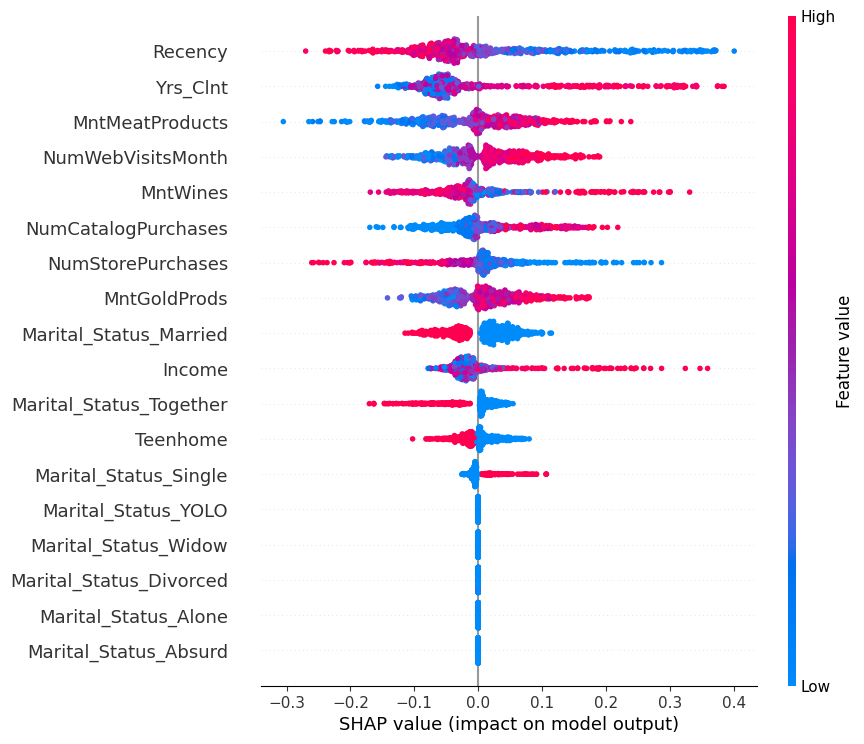

In [141]:
shap.plots.beeswarm(
    exps_test,
    max_display = 22
)